In [1]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver_win32/chromedriver')
browser.implicitly_wait(3)
# url에 접근한다.
browser.set_window_size(1920, 1280)
browser.get('https://engineering.stanford.edu/')

In [2]:
print('source : {}'.format(browser.page_source))

source : <html lang="en" dir="ltr" class="js"><!-- <![endif]--><head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-152x152.png" rel="apple-touch-icon" sizes="152x152">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-144x144.png" rel="apple-touch-icon" sizes="144x144">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-120x120.png" rel="apple-touch-icon" sizes="120x120">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76">
<link href="/sites/all/themes/stanford_framework/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72">
<link href="/sites/all/themes/stanf

In [3]:
print('Session ID: {}'.format(browser.session_id))
print('Title : {}'.format(browser.title))
print('URL : {}'.format(browser.current_url))
print('Cookies : {}'.format(browser.get_cookies))

Session ID: 18144c424f72e611121a91bd6d48a212
Title : Home | Stanford School of Engineering
URL : https://engineering.stanford.edu/
Cookies : <bound method WebDriver.get_cookies of <selenium.webdriver.chrome.webdriver.WebDriver (session="18144c424f72e611121a91bd6d48a212")>>


홈페이지에 접속해서  text 를 긁어오는 코드 >> urlopen에 웹주소를 붙이고 실행하면 텍스트파일로 자동 저장됨

In [43]:
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
from html.parser import HTMLParser

with urllib.request.urlopen('https://engineering.stanford.edu/magazine/article/emma-brunskill-amped-education-ai') as response:
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')
    all_divs = soup.find_all("p")
    #print(all_divs)
    
    interviews = []
    for interview in all_divs:
        interviews.append(interview.get_text().strip().replace('\n', '').replace('\t', '').replace('\r', ''))
    
    file = open("CrawingData/standford_CS_interview_3.txt", 'w', encoding="utf-8")
    

    
    for i in interviews:
        file.write(i + "\n")
    
    print(i)
    file.close()

© Stanford University, Stanford, California 94305.


텍스트 데이터 형태소 분석

['\n', 'The stakes are high: Better education is key to solving big societal challenges, like poverty alleviation. | Stocksy/MaaHoo Studio\n', 'Computer programs that purport to help humans learn have been around almost as long as there have been computer programs, but their track record for success has been less than impressive.\n', 'Emma Brunskill, an expert on artificial intelligence and machine learning, thinks that less-than-stellar record is about to change and has dedicated her career to finding new and better ways to teach computers to teach humans. Her research creates innovative “reinforcement learning” algorithms in which computers learn through experience to get better at teaching humans. In the process, the algorithms lead people to make better, more-informed decisions that produce better outcomes in the long run.\n', 'To Brunskill this is no schoolroom affair, but an endeavor where the stakes are high. She says that better education is key to big societal challenges, like

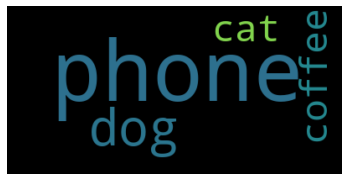

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

file = open('CrawingData/standford_CS_interview_3.txt', 'r', encoding = 'utf-8')
lines = file.readlines()

print(lines)
text = "coffee phone phone phone phone phone phone phone phone phone cat dog dog"

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=100).generate(text)

# Display the generated image:
# the matplotlib way:

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('CrawingData/wordcloud_interview_3.svg')
    

In [79]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])
font = "Black Note"
font_path = "CrawingData/%s.ttf" % font

icon = "logo-mit-png-file-mit-logo-svg-800"
icon_path = "CrawingData/%s.png" % icon

f = open("CrawingData/standford_CS_interview_3.txt", 'r', encoding = 'utf-8')
message = f.read()
#print(message)
f.close()

icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42)
               
# generate word cloud
wc.generate_from_text(message)
wc.recolor(color_func=color_func, random_state=3)
wc.to_file("wordCloudExample.png")

In [97]:
# IMPORT PACKAGES
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from palettable.colorbrewer.qualitative import Dark2_8

import numpy as np
import tensorflow as tf
import re
import time
import pandas as pd

#---------------------------------------

lines = open('CrawingData/standford_CS_interview_3.txt', encoding='utf-8', errors = 'ignore').read().split('.')
print(len(lines))

id2line = []
# print(lines[:10])
# print()
for line in lines:
    _line = line.split('\t0\n')
    
    id2line.append(_line)
    
    
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'l'", "will", text)
    text = re.sub(r"\'ve'", "have", text)
    text = re.sub(r"\d", "would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"[-()\"/@;'<>'.?,|]", "", text)
    return text


id2line = []
for i in lines:
    id2line.append(clean_text(i))


word2count = {}
for question in id2line:
    for word in question.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
            
print(word2count)            
#------------------------
            

# FONT, ICON, MASK
font = "Black Note"
font_path = "CrawingData/%s.ttf" % font

icon = "logo-mit-png-file-mit-logo-svg-800"
icon_path = "CrawingData/%s.png" % icon

icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# Word Cloud with colored mask
wc = WordCloud(font_path=font_path, background_color="white", max_words=20000, mask=mask,
               max_font_size=300, random_state=42)

coloring = np.array(Image.open(icon_path))
image_colors = ImageColorGenerator(coloring)
image_colors.default_color = [0.6,0.6,0.6] # Important!!! at 2018.07.07

# Generate word cloud
wc.generate_from_frequencies(word2count)
wc.recolor(None, None, None)
wc.to_file("CrawingData/output.png")

297
{'the': 150, 'stakes': 2, 'are': 49, 'high:': 1, 'better': 29, 'education': 16, 'is': 88, 'key': 3, 'to': 182, 'solving': 1, 'big': 5, 'societal': 3, 'challenges': 8, 'like': 35, 'poverty': 3, 'alleviation': 2, 'stocksymaahoo': 1, 'studio': 1, 'computer': 10, 'programs': 3, 'that': 168, 'purport': 1, 'help': 11, 'humans': 7, 'learn': 23, 'have': 40, 'been': 9, 'around': 2, 'almost': 2, 'as': 18, 'long': 3, 'there': 22, 'but': 32, 'their': 14, 'track': 2, 'record': 3, 'for': 62, 'success': 4, 'has': 13, 'less': 4, 'than': 8, 'impressive': 1, 'emma': 47, 'brunskill': 10, 'an': 14, 'expert': 2, 'on': 22, 'artificial': 3, 'intelligence': 3, 'and': 183, 'machine': 8, 'learning': 46, 'thinks': 1, 'lessthanstellar': 1, 'about': 42, 'change': 1, 'dedicated': 1, 'her': 4, 'career': 1, 'finding': 1, 'new': 11, 'ways': 6, 'teach': 4, 'computers': 12, 'research': 3, 'creates': 1, 'innovative': 1, '“reinforcement': 1, 'learning”': 1, 'algorithms': 11, 'in': 82, 'which': 10, 'through': 8, 'exper